In [1]:
import subprocess
from dotenv import load_dotenv
load_dotenv()

def run_shell_command(command):
    """
    Run a shell command and return the output.

    Args:
    - command (str): The shell command to execute.

    Returns:
    - str: The output of the command.
    """
    try:
        result = subprocess.run(
            command,
            shell=True,
            check=True,
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True,
        )
        print(result.stdout.strip())
        return result.stdout.strip()

    except subprocess.CalledProcessError as e:
        # If the command fails, you might want to handle the error
        print(f"Command Failed. Error Message: {e.stderr.strip()}")
        return None

In [2]:
from faster_whisper import WhisperModel

model_size = "medium"
model = WhisperModel(model_size, compute_type="float32")

/home/sumit/.pyenv/versions/3.10.11/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dummy = True

In [4]:
#@markdown # **Content Generation** 🚀

import os, json, re, random
from openai import OpenAI

client = OpenAI(
    # This is the default and can be omitted
    api_key = os.getenv('OPENAI_API_KEY'),
)

topics = [
    "space",
    "planets",
    "universe",
    "science",
    "history",
    "technology",
    "books",
    "quotes",
    "reading",
    "stoicism",
    "travel",
    "horror",
    "hell",
    "meditation",
    "book summaries",
    "language learning tips",
    "DIY tips"
]

random_topic = random.choice(topics)
if dummy == False:
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": "You are an expert short form video content generator, which is very interesting to listen to, user get's deeply involved in your generated content.",
            },
            {
                "role": "user",
                "content": "Generate a very interesting mind boggling fact (on topic: " + random_topic + ") based 1 min long story for short form 2 min long video. Also give 3 strictly one word videoTags (dont give two words combined in one word) that acurately represents main props/ objects/ features in the stock footage that should be used in this video (these tags will be used further to searching stock footage) (order of tags should be in decreasing order of matching) The script you provide will be converted to speech using TTS, so give your write it accordingly, with appropriate punctuations. Also return seo title, seo description and seo hashtags for youtube uploads. Return your answer strictly in this json format: { 'script': '', videoTags: [], seoTitle: '', seoDescription: '', seoHashtags: '' }"
            }
        ],
        model="gpt-3.5-turbo-1106",
        response_format={ "type": "json_object" },
    )

    content = json.loads(chat_completion.choices[0].message.content)
    audioScript = re.sub(r'#[a-zA-Z0-9_]+', '', content.get("script"))
    
else :
    content = {
        "script": "Did you know that book summaries can compress an entire book into just a few pages, capturing the essence of the story in a fraction of the time it takes to read the full book? It's like a literary magic trick, condensing complex plots and rich characters into concise summaries. Imagine being able to grasp the entire story of a novel in just a few minutes, unlocking the key insights and themes without having to invest hours in reading. It's a fascinating concept that showcases the power of distillation and interpretation. Book summaries are like a gateway to countless stories, offering a shortcut to knowledge and expanding your literary horizons in a fraction of the time. Dive into the world of book summaries and unlock a treasure trove of literary wisdom!",
        "videoTags": [
            "book",
            "book",
            "summary",
            "knowledge"
        ],
        "seoTitle": "Unlocking the Power of Book Summaries: Dive into a World of Literary Wisdom",
        "seoDescription": "Discover the fascinating world of book summaries, where entire novels are condensed into a fraction of the time, unlocking key insights and themes without reading the full books. Dive into a treasure trove of literary wisdom!",
        "seoHashtags": "#BookSummaries #LiteraryWisdom #KnowledgeIsPower"
    }
seoTitle = content.get("seoTitle")
seoHashtags = content.get("seoHashtags")
seoDescription = content.get("seoDescription")
videoTags = content.get("videoTags")
videoTags.insert(0, random_topic.split(" ")[0])

print(json.dumps(content, indent=4))


{
    "script": "Did you know that book summaries can compress an entire book into just a few pages, capturing the essence of the story in a fraction of the time it takes to read the full book? It's like a literary magic trick, condensing complex plots and rich characters into concise summaries. Imagine being able to grasp the entire story of a novel in just a few minutes, unlocking the key insights and themes without having to invest hours in reading. It's a fascinating concept that showcases the power of distillation and interpretation. Book summaries are like a gateway to countless stories, offering a shortcut to knowledge and expanding your literary horizons in a fraction of the time. Dive into the world of book summaries and unlock a treasure trove of literary wisdom!",
    "videoTags": [
        "book",
        "book",
        "book",
        "summary",
        "knowledge"
    ],
    "seoTitle": "Unlocking the Power of Book Summaries: Dive into a World of Literary Wisdom",
    "s

In [5]:
#@markdown # **Audio File (TTS)** 🚀

import os
from datetime import datetime
from openai import OpenAI
from IPython.display import Audio

client = OpenAI(
    # This is the default and can be omitted
    api_key = api_key = os.getenv('OPENAI_API_KEY'),
)

audioPath = "./assets/audios/ai_audio.mp3"
audiofilename = audioPath

if dummy == False:
    response = client.audio.speech.create(
        model="tts-1",
        voice="alloy",
        input=audioScript,
    )
    response.stream_to_file(audioPath)

Audio(audioPath)


In [6]:
#@markdown # **Video File (Pexels)** 🚀

import requests, random
import urllib.request

from datetime import datetime

url = "https://api.pexels.com/videos/search"
headers = {
    "Authorization": "aZB4nryvsXVSv6T6EUWmf4flWHX1ZPestuRD0OQ91FgEL5H9XuRxnxHH"
}

verticalFormatVideos = []

for tag in videoTags:
  params = {
    "query": tag,
    "per_page": 80
    }

  response = requests.get(url, headers=headers, params=params)

  apiResponse = response.json().get('videos')

  firstVideoWidth = 0
  firstVideoHeight = 0

  for entry in apiResponse:
    for video in entry.get("video_files"):
      aspectRatio = video.get("width") / video.get("height")
      if aspectRatio < 1:
        if firstVideoWidth == 0 or firstVideoHeight == 0 :
          firstVideoWidth = video.get("width")
          firstVideoHeight = video.get("height")
          verticalFormatVideos.append(video)
        else :
          if firstVideoWidth == video.get("width") and firstVideoHeight == video.get("height"):
            verticalFormatVideos.append(video)

print("Video count: ", len(verticalFormatVideos), "\n\n")
videoUrl_1 = verticalFormatVideos[random.randint(0, len(verticalFormatVideos) - 1)].get("link")
videoUrl_2 = verticalFormatVideos[random.randint(0, len(verticalFormatVideos) - 1)].get("link")
videoUrl_3 = verticalFormatVideos[random.randint(0, len(verticalFormatVideos) - 1)].get("link")

videoPath_1 = "./assets/videos/stock_video_1.mp4"
videoPath_2 = "./assets/videos/stock_video_2.mp4"
videoPath_3 = "./assets/videos/stock_video_3.mp4"

with urllib.request.urlopen(videoUrl_1) as response:
    with open(videoPath_1, "wb") as file:
        file.write(response.read())

with urllib.request.urlopen(videoUrl_2) as response:
    with open(videoPath_2, "wb") as file:
        file.write(response.read())

with urllib.request.urlopen(videoUrl_3) as response:
    with open(videoPath_3, "wb") as file:
        file.write(response.read())


Video count:  92 




In [7]:
#@markdown # **Merge Audio & Video** 🚀
if dummy == False:
    audioDuration = int(float(run_shell_command('ffprobe -i assets/audios/ai_audio.mp3 -show_entries format=duration -v quiet -of csv="p=0"'))) + 2

    run_shell_command('ffmpeg -i assets/videos/stock_video_1.mp4 -i assets/videos/stock_video_2.mp4 -i assets/videos/stock_video_3.mp4 -i ./assets/audios/ai_audio.mp3 -filter_complex "[0:v][1:v][2:v]concat=n=3:v=1:a=0[outv];[3:a]aformat=sample_fmts=fltp:sample_rates=44100:channel_layouts=stereo[a]" -map "[outv]" -map "[a]" -vsync vfr -ss 00 -to ' + str(audioDuration) + ' -crf 24 -y assets/videos/trimmed_video.mp4')

    # run_shell_command('ffmpeg -i ./assets/videos/trimmed_video.mp4 -ss 00 -to 5 -c:a copy -y assets/videos/trimmed_video.mp4')

output_video_path = "./assets/videos/trimmed_video.mp4"
print(f"Combined video saved to: {output_video_path}")

Combined video saved to: ./assets/videos/trimmed_video.mp4


https://github.com/guillaumekln/faster-whisper

In [8]:
segments, info = model.transcribe(audioPath, word_timestamps=True)
segments = list(segments)  # The transcription will actually run here.
for segment in segments:
    for word in segment.words:
        print("[%.2fs -> %.2fs] %s" % (word.start, word.end, word.word))

invalid new backstep -1


[0.00s -> 0.18s]  Did
[0.18s -> 0.36s]  you
[0.36s -> 0.54s]  know
[0.54s -> 0.78s]  that
[0.78s -> 1.00s]  book
[1.00s -> 1.46s]  summaries


In [9]:
import json

wordlevel_info = []

for segment in segments:
    for word in segment.words:
      wordlevel_info.append({'word':word.word,'start':word.start,'end':word.end})

modified_wordlevel_info = []
for word_info in wordlevel_info:
    modified_wordlevel_info.append({'start': word_info['start'], 'end': word_info['end'], 'word': word_info['word'].strip()})

with open('./assets/files/data.json', 'w') as f:
    json.dump(modified_wordlevel_info, f,indent=4)



In [10]:
def split_text_into_lines(data):

    MaxChars = 15
    #maxduration in seconds
    MaxDuration = 2.5
    #Split if nothing is spoken (gap) for these many seconds
    MaxGap = 1.5

    subtitles = []
    line = []
    line_duration = 0
    line_chars = 0


    for idx,word_data in enumerate(data):
        word = word_data["word"]
        start = word_data["start"]
        end = word_data["end"]

        line.append(word_data)
        line_duration += end - start

        temp = " ".join(item["word"] for item in line)


        # Check if adding a new word exceeds the maximum character count or duration
        new_line_chars = len(temp)

        duration_exceeded = line_duration > MaxDuration
        chars_exceeded = new_line_chars > MaxChars
        if idx>0:
          gap = word_data['start'] - data[idx-1]['end']
          # print (word,start,end,gap)
          maxgap_exceeded = gap > MaxGap
        else:
          maxgap_exceeded = False


        if duration_exceeded or chars_exceeded or maxgap_exceeded:
            if line:
                subtitle_line = {
                    "word": " ".join(item["word"] for item in line),
                    "start": line[0]["start"],
                    "end": line[-1]["end"],
                    "textcontents": line
                }
                subtitles.append(subtitle_line)
                line = []
                line_duration = 0
                line_chars = 0


    if line:
        subtitle_line = {
            "word": " ".join(item["word"] for item in line),
            "start": line[0]["start"],
            "end": line[-1]["end"],
            "textcontents": line
        }
        subtitles.append(subtitle_line)

    return subtitles
    
linelevel_subtitles = split_text_into_lines(modified_wordlevel_info)



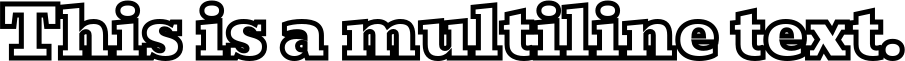

In [32]:
try:
    import gizeh as gz
    GIZEH_AVAILABLE = True
except ImportError:
    GIZEH_AVAILABLE = False
import numpy as np
from moviepy.editor import ImageClip

def autocrop(np_img):
    if len(np_img.shape) == 3:
        if np_img.shape[2] == 4:
            thresholded_img = np_img[:,:,3] # use the mask
        else:
            thresholded_img = np_img.max(axis=2) # black margins
    zone_x = thresholded_img.max(axis=0).nonzero()[0]
    xmin, xmax = zone_x[0], zone_x[-1]
    zone_y = thresholded_img.max(axis=1).nonzero()[0]
    ymin, ymax = zone_y[0], zone_y[-1]
    return np_img[ymin:ymax+1, xmin:xmax+1]

def text_clip(text, font, align='left',
              font_weight='900', font_slant='normal',
              fontsize = 70, font_width = 80,
              interline= 9, color=(0,0,0),
              stroke_color=(0, 0, 0), stroke_width=2,
              bg_color=None):
    
    if not GIZEH_AVAILABLE:
        raise ImportError("`text_clip` requires Gizeh installed.")

    stroke_color = np.array(stroke_color)/255.0
    color = np.array(color)/255.0
    if bg_color is not None:
        np.array(bg_color)/255.0

    if font_width is None:
        font_width = fontsize
    if interline is None:
        interline = 0.3 * fontsize
    line_height = fontsize + interline
    # lines = text.splitlines()
    # max_line = max(len(l) for l in lines)
    W = int(len(text) * font_width + 2 * stroke_width)
    H = int(line_height + 2 * stroke_width)
    surface = gz.Surface(width=W, height=H, bg_color=bg_color)
    xpoint = {
        'center': W/2,
        'left': stroke_width + 1,
        'right': W - stroke_width - 1
    }[align]
    # for i, line in enumerate(lines):
    # ypoint = (i+1) * line_height
    ypoint = line_height
    text_element = gz.text(text, fontfamily=font, fontsize=fontsize,
                        h_align=align, v_align='top',
                        xy=[xpoint, ypoint], fontslant=font_slant,
                        stroke=stroke_color, stroke_width=stroke_width,
                        fill=color)
    text_element.draw(surface)
    cropped_img = autocrop(surface.get_npimage(transparent=True))
    return ImageClip(cropped_img)

# Example
clip = text_clip("This is a multiline text.", font="Bevan", color=(255,255,255), stroke_color=(0, 0, 0),stroke_width=5)
clip.ipython_display()

## Step7: Use Moviepy to create an audiogram with word-level highlights as they are spoken

In [34]:
from moviepy.editor import TextClip, CompositeVideoClip, ColorClip
import numpy as np


def create_caption(textJSON, framesize,font = "Bevan Regular",color='white', highlight_color='yellow',stroke_color='black',stroke_width=5):
    wordcount = len(textJSON['textcontents'])
    full_duration = textJSON['end']-textJSON['start']

    word_clips = []
    xy_textclips_positions =[]

    x_pos = 50
    y_pos = 0
    line_width = 0  # Total width of words in the current line
    frame_width = framesize[0]
    frame_height = framesize[1]

    x_buffer = frame_width*1/12
    y_buffer = frame_height*1/5


    max_line_width = frame_width - 2 * (x_buffer)

    fontsize = int(frame_height * 0.035) #3.5 percent of video height


    space_width = ""
    space_height = ""

    for index,wordJSON in enumerate(textJSON['textcontents']):
      duration = wordJSON['end']-wordJSON['start']
      word_clip = TextClip(wordJSON['word'], font = font,fontsize=fontsize, color=color,stroke_color=stroke_color,stroke_width=stroke_width).set_start(textJSON['start']).set_duration(full_duration)
      word_clip_space = TextClip(" ", font = font,fontsize=fontsize, color=color).set_start(textJSON['start']).set_duration(full_duration)
      word_width, word_height = word_clip.size
      space_width,space_height = word_clip_space.size
      print(space_width, space_height)
      if line_width + word_width+ space_width <= max_line_width:
            # Store info of each word_clip created
            xy_textclips_positions.append({
                "x_pos":x_pos,
                "y_pos": y_pos,
                "width" : word_width,
                "height" : word_height,
                "word": wordJSON['word'],
                "start": wordJSON['start'],
                "end": wordJSON['end'],
                "duration": duration
            })

            word_clip = word_clip.set_position((x_pos, y_pos))
            word_clip_space = word_clip_space.set_position((x_pos+ word_width, y_pos))

            x_pos = x_pos + word_width+ space_width
            line_width = line_width+ word_width + space_width
      else:
            # Move to the next line
            x_pos = 0
            y_pos = y_pos+ word_height+8
            line_width = word_width + space_width

            # Store info of each word_clip created
            xy_textclips_positions.append({
                "x_pos":x_pos,
                "y_pos": y_pos,
                "width" : word_width,
                "height" : word_height,
                "word": wordJSON['word'],
                "start": wordJSON['start'],
                "end": wordJSON['end'],
                "duration": duration
            })

            word_clip = word_clip.set_position((x_pos, y_pos))
            word_clip_space = word_clip_space.set_position((x_pos+ word_width , y_pos))
            x_pos = word_width + space_width


      word_clips.append(word_clip)
      word_clips.append(word_clip_space)


    for highlight_word in xy_textclips_positions:

      word_clip_highlight = TextClip(highlight_word['word'], font = font,fontsize=fontsize, color=highlight_color,stroke_color=stroke_color,stroke_width=stroke_width).set_start(highlight_word['start']).set_duration(highlight_word['duration'])
      word_clip_highlight = word_clip_highlight.set_position((highlight_word['x_pos'], highlight_word['y_pos']))
      word_clips.append(word_clip_highlight)

    return word_clips,xy_textclips_positions


In [ ]:
from moviepy.editor import TextClip, CompositeVideoClip, concatenate_videoclips,VideoFileClip, ColorClip
from PIL import Image, ImageDraw
import time
import tempfile


input_video = VideoFileClip(output_video_path)
frame_size = input_video.size

all_linelevel_splits=[]

for line in linelevel_subtitles:
  out_clips,positions = create_caption(line,frame_size)

  max_width = 0
  max_height = 0

  for position in positions:
    # print (out_clip.pos)
    # break
    x_pos, y_pos = position['x_pos'],position['y_pos']
    width, height = position['width'],position['height']

    max_width = max(max_width, x_pos + width)
    max_height = max(max_height, y_pos + height)


  color_clip = ColorClip(size=(int(max_width*1.1), int(max_height*1.1)), color=(255, 154, 172))

  color_clip = color_clip.set_opacity(1)

  color_clip = color_clip.set_start(line['start']).set_duration(line['end']-line['start'])

  clip_to_overlay = CompositeVideoClip([color_clip]+ out_clips)
  clip_to_overlay = clip_to_overlay.set_position("center")

  all_linelevel_splits.append(clip_to_overlay)

input_video_duration = input_video.duration


final_video = CompositeVideoClip([input_video] + all_linelevel_splits)

# Set the audio of the final video to be the same as the input video
final_video = final_video.set_audio(input_video.audio)

# Save the final clip as a video file with the audio included
reelPath = "./assets/reels/reel_" + str(int(time.time())) + ".mp4"
final_video.write_videofile(reelPath, fps=30, codec="libx264", audio_codec="aac")

## Youtube Upload

In [ ]:
# seoHashtags = "#facts #tips #latest"
run_shell_command("ffmpeg -i " + reelPath + " -frames:v 1 -ss 3 -f image2  -y assets/images/yt_thumbnail.png")
import json
with open('./assets/files/yt_upload_args.json', 'w') as f:
    json.dump({
        "title": seoTitle.split("|")[0].strip(),
        "description": seoDescription,
        "tags": seoHashtags,
        "videoFilePath": reelPath,
        "thumbFilePath": "assets/images/yt_thumbnail.png"
    }, f, indent=4)
run_shell_command("node utils/youtube-upload.js run")


# DESCRIPT LIKE SUBTITLES

In [35]:
from moviepy.editor import TextClip, CompositeVideoClip, ColorClip
import gizeh as gz
import numpy as np


def create_caption(textJSON, framesize, font = "Bevan", color=(255, 255, 255), bgcolor=(253, 235, 55), stroke_color=(0, 0, 0),stroke_width=5):
    wordcount = len(textJSON['textcontents'])
    full_duration = textJSON['end']-textJSON['start']

    word_clips = []
    xy_textclips_positions =[]
    
    x_pos = 0
    y_pos = 0
    # max_height = 0
    frame_width = framesize[0]
    frame_height = framesize[1]

    x_buffer = frame_width*1/12
    y_buffer = frame_height*1/2

    fontsize = int(frame_height * 0.035) #3.5 percent of video height

    space_width = 0
    space_height = 0

    for index,wordJSON in enumerate(textJSON['textcontents']):
      duration = wordJSON['end']-wordJSON['start']

      # TextClip
      word_clip = text_clip(wordJSON['word'], font = font,fontsize=fontsize, color=color, stroke_color=stroke_color,stroke_width=stroke_width, align="center").set_start(textJSON['start']).set_duration(full_duration)
      # word_clip_space = text_clip("_", font = font,fontsize=fontsize, color=color).set_start(textJSON['start']).set_duration(full_duration)
      word_width, word_height = word_clip.size
      # space_width,space_height = word_clip_space.size

      # Uncomment if adding a space text clip
      if x_pos + word_width + space_width > frame_width-2*x_buffer:
      # if x_pos + word_width > frame_width-2*x_buffer:
            # Move to the next line
            x_pos = 0
            y_pos = y_pos+ word_height+40

            # Store info of each word_clip created
            xy_textclips_positions.append({
                "x_pos":x_pos+x_buffer,
                "y_pos": y_pos+y_buffer,
                "width" : word_width,
                "height" : word_height,
                "word": wordJSON['word'],
                "start": wordJSON['start'],
                "end": wordJSON['end'],
                "duration": duration
            })

            word_clip = word_clip.set_position((x_pos+x_buffer, y_pos+y_buffer))
            # word_clip_space = word_clip_space.set_position((x_pos+ word_width +x_buffer, y_pos+y_buffer))
            x_pos = word_width + space_width
      else:
            # Store info of each word_clip created
            xy_textclips_positions.append({
                "x_pos":x_pos+x_buffer,
                "y_pos": y_pos+y_buffer,
                "width" : word_width,
                "height" : word_height,
                "word": wordJSON['word'],
                "start": wordJSON['start'],
                "end": wordJSON['end'],
                "duration": duration
            })

            word_clip = word_clip.set_position((x_pos+x_buffer, y_pos+y_buffer))
            # word_clip_space = word_clip_space.set_position((x_pos+ word_width+ x_buffer, y_pos+y_buffer))

            x_pos = x_pos + word_width + space_width

      # word_clips.append(word_clip_space)  
      word_clips.append(word_clip)
      # word_clips.append(word_clip_space)  


    for highlight_word in xy_textclips_positions:
      
      word_clip_highlight = text_clip(highlight_word['word'], font=font, fontsize=fontsize, color=color, bg_color = bgcolor, stroke_color=stroke_color,stroke_width=stroke_width, align="center").set_start(highlight_word['start']).set_duration(highlight_word['duration'])
      word_clip_highlight = word_clip_highlight.set_position((highlight_word['x_pos'], highlight_word['y_pos']))
      word_clips.append(word_clip_highlight)

    return word_clips



In [36]:
from moviepy.editor import TextClip, CompositeVideoClip, concatenate_videoclips,VideoFileClip, ColorClip




# input_video = VideoFileClip(output_video_path)
# frame_size = input_video.size

# all_linelevel_splits=[]

# for line in linelevel_subtitles:
#   out_clips,positions = create_caption(line,frame_size)

#   max_width = 0
#   max_height = 0

#   for position in positions:
#     # print (out_clip.pos)
#     # break
#     x_pos, y_pos = position['x_pos'],position['y_pos']
#     width, height = position['width'],position['height']

#     max_width = max(max_width, x_pos + width)
#     max_height = max(max_height, y_pos + height)


#   color_clip = ColorClip(size=(int(max_width*1.1), int(max_height*1.1)), color=(255, 154, 172))

#   color_clip = color_clip.set_opacity(1)

#   color_clip = color_clip.set_start(line['start']).set_duration(line['end']-line['start'])

#   clip_to_overlay = CompositeVideoClip([color_clip]+ out_clips)
#   clip_to_overlay = clip_to_overlay.set_position("center")

#   all_linelevel_splits.append(clip_to_overlay)

# input_video_duration = input_video.duration


# final_video = CompositeVideoClip([input_video] + all_linelevel_splits)

# # Set the audio of the final video to be the same as the input video
# final_video = final_video.set_audio(input_video.audio)

# # Save the final clip as a video file with the audio included
# reelPath = "./assets/reels/reel_" + str(int(time.time())) + ".mp4"
# final_video.write_videofile(reelPath, fps=30, codec="libx264", audio_codec="aac")






# Load the input video
input_video = VideoFileClip(output_video_path)
frame_size = input_video.size

all_linelevel_splits=[]

for line in linelevel_subtitles:
  out = create_caption(line,frame_size)
  all_linelevel_splits.extend(out)

# Get the duration of the input video
input_video_duration = input_video.duration
# Create a color clip with the given frame size, color, and duration
# background_clip = ColorClip(size=frame_size, color=(255, 154, 172)).set_duration(input_video_duration)

# If you want to overlay this on the original video uncomment this and also change frame_size, font size and color accordingly.
final_video = CompositeVideoClip([input_video] + all_linelevel_splits).set_position("center")

# final_video = CompositeVideoClip([background_clip] + all_linelevel_splits)

# Set the audio of the final video to be the same as the input video
final_video = final_video.set_audio(input_video.audio)

# Save the final clip as a video file with the audio included
final_video.write_videofile("output.mp4", fps=15, codec="libx264", audio_codec="aac", ffmpeg_params=['-pix_fmt', 'yuv420p'])


Moviepy - Building video output.mp4.
MoviePy - Writing audio in outputTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video output.mp4



t:  76%|███████▌  | 57/75 [00:36<00:19,  1.08s/it, now=None]

: 

In [36]:
run_shell_command('ffmpeg -i ./assets/videos/trimmed_video.mp4 -ss 00 -to 10 -c:a copy -y assets/videos/trimmed_video.mp4')

''